## **FINAL TEST** 

## **CÔNG VIỆC 1: KHÁM PHÁ VÀ XỬ LÝ DỮ LIỆU** 

In [7]:
import findspark 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from pyspark.sql import functions as F
from functools import reduce

from bokeh.plotting import figure, show, output_notebook, curdoc
from bokeh.models import ColumnDataSource, HoverTool, LabelSet, Slider, CustomJS

from bokeh.layouts import column, row

from bokeh.palettes import Bright3

import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import norm

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('test').getOrCreate()


 **a) *Tải và đọc dữ liệu bằng Pandas***

In [37]:
math =  spark.read.csv(r'student-mat.csv', header= True, inferSchema= True , sep=';')

math.toPandas()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


***Kiểm tra số lượng dữ liệu trong mỗi cột*** 

In [9]:
math =  spark.read.csv(r'student-mat.csv', header= True, inferSchema= True , sep=';')

for column in math.columns:
    print(f"\nGiá trị trong cột: {column}")
    math.groupBy(column).count().orderBy("count", ascending=False).show(truncate=False)


Giá trị trong cột: school
+------+-----+
|school|count|
+------+-----+
|GP    |349  |
|MS    |46   |
+------+-----+


Giá trị trong cột: sex
+---+-----+
|sex|count|
+---+-----+
|F  |208  |
|M  |187  |
+---+-----+


Giá trị trong cột: age


+---+-----+
|age|count|
+---+-----+
|16 |104  |
|17 |98   |
|15 |82   |
|18 |82   |
|19 |24   |
|20 |3    |
|22 |1    |
|21 |1    |
+---+-----+


Giá trị trong cột: address
+-------+-----+
|address|count|
+-------+-----+
|U      |307  |
|R      |88   |
+-------+-----+


Giá trị trong cột: famsize
+-------+-----+
|famsize|count|
+-------+-----+
|GT3    |281  |
|LE3    |114  |
+-------+-----+


Giá trị trong cột: Pstatus
+-------+-----+
|Pstatus|count|
+-------+-----+
|T      |354  |
|A      |41   |
+-------+-----+


Giá trị trong cột: Medu
+----+-----+
|Medu|count|
+----+-----+
|4   |131  |
|2   |103  |
|3   |99   |
|1   |59   |
|0   |3    |
+----+-----+


Giá trị trong cột: Fedu
+----+-----+
|Fedu|count|
+----+-----+
|2   |115  |
|3   |100  |
|4   |96   |
|1   |82   |
|0   |2    |
+----+-----+


Giá trị trong cột: Mjob
+--------+-----+
|Mjob    |count|
+--------+-----+
|other   |141  |
|services|103  |
|at_home |59   |
|teacher |58   |
|health  |34   |
+--------+-----+


Giá trị trong 

**b) *Phân tích cơ bản: Kiểm tra giá trị bị thiếu và xử lý (thay bằng trung bình hoặc loại bỏ)***

 ***Kiểm tra dữ liệu bị thiếu***

In [10]:

def count_rows_with_null(df):
    # Tính tổng số null trong mỗi dòng
    non_null_count = reduce(
        lambda a, b: a + b,
        [F.when(F.col(c).isNull(), 1).otherwise(0) for c in df.columns]
    )
    
    # Lọc các dòng không có một giá trị null và đếm
    rows_with_notnull = df.filter(non_null_count < 1).count()

    return rows_with_notnull

# Gọi hàm và in kết quả
rows_with_null_count = count_rows_with_null(math)

print(f"Total rows: {math.count()}")
print(f"Rows dont have null values: {rows_with_null_count}")



Total rows: 395
Rows dont have null values: 395


 ***Mô tả thông số dữ liệu***

In [11]:
import pandas as pd

df = pd.read_csv("student-mat.csv", sep=';')
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


 ***Kiểm tra kiểu dữ liệu của các cột thông tin***

In [12]:
import pandas as pd

df = pd.read_csv("student-mat.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

**c) *Báo cáo ngắn về đặc điểm dữ liệu: số bản ghi, phân phối G3, studytime,...***

## **Tổng quan các biến định lượng trong tập dữ liệu**

---

### **1. `age` (Tuổi học sinh)**
- **Trung bình**: 16 tuổi  
- **Khoảng dao động**: 15 đến 22 tuổi  
- **75% học sinh ≤ 18 tuổi** → phần lớn thuộc độ tuổi trung học phổ thông  
- **Độ lệch chuẩn (Std)**: 1.28 → học sinh có độ tuổi khá đồng đều

---

### **2. `Medu` (Trình độ học vấn của mẹ)**
- **Trung bình**: 2.75 ≈ trình độ trung học phổ thông  
- **Khoảng giá trị**: 0 (không đi học) → 4 (đại học)  
- **50% học sinh có mẹ học từ cấp 3 trở lên**  
- **Std**: 1.09 → trình độ học vấn mẹ đa dạng vừa phải

---

### **3. `Fedu` (Trình độ học vấn của cha)**
- **Trung bình**: 2.52 → từ trung học cơ sở đến trung học phổ thông  
- **Phân bố tương tự `Medu`**  
- **Std**: 1.09 → mức độ phân tán tương đương với `Medu`

---

### **4. `traveltime` (Thời gian đi học)**
- **Trung bình**: 1.45 ≈ dưới 15 phút  
- **Giá trị tối đa**: 4 (trên 1 tiếng)  
- **Phần lớn học sinh** mất < 30 phút đến trường  
- **Std**: 0.70 → mức chênh lệch thấp, đa số ở gần trường

---

### **5. `studytime` (Thời gian học mỗi tuần)**
- **Trung bình**: 2.03 (≈ 2–5 giờ/tuần)  
- **Std**: 0.84 → có sự khác biệt tương đối giữa các học sinh

---

### **6. `failures` (Số lần trượt môn)**
- **Trung bình**: 0.33 → đa số học sinh chưa từng trượt môn  
- **Giá trị tối đa**: 3  
- **75% học sinh có số lần trượt là 0**  
- **Std**: 0.74 → có một số học sinh trượt nhiều làm tăng độ lệch

---

### **7. `famrel` (Mối quan hệ trong gia đình)**
- **Trung bình**: 3.94 (mức tốt)  
- **Khoảng giá trị**: 1 (rất tệ) → 5 (rất tốt)  
- **75% học sinh đánh giá từ mức 4 trở lên**  
- **Std**: 0.90 → phân bố khá đồng đều

---

### **8. `freetime` (Thời gian rảnh sau giờ học)**
- **Trung bình**: 3.23 (~3 giờ/ngày)  
- **Std**: 1.00 → phân bố khá đa dạng

---

### **9. `goout` (Mức độ ra ngoài với bạn bè)**
- **Trung bình**: 3.11  
- **Khoảng dao động**: 1 → 5  
- **Std**: 1.11 → hoạt động xã hội có sự khác biệt rõ giữa học sinh

---

### **10. `Dalc` (Tiêu thụ rượu ngày thường)**
- **Trung bình**: 1.48 (rất thấp)  
- **Phần lớn học sinh không sử dụng hoặc sử dụng ít**  
- **Std**: 0.89 → có biến động trong một số trường hợp cá biệt

---

### **11. `Walc` (Tiêu thụ rượu cuối tuần)**
- **Trung bình**: 2.29  
- **Mức tiêu thụ cao hơn ngày thường nhưng vẫn thấp**  
- **Std**: 1.29 → biến động nhiều hơn Dalc

---

### **12. `health` (Tình trạng sức khỏe hiện tại)**
- **Trung bình**: 3.55  
- **Phần lớn đánh giá sức khỏe ở mức tốt trở lên**  
- **Std**: 1.39 → phản ánh sự khác biệt trong tình trạng sức khỏe

---

### **13. `absences` (Số buổi vắng mặt)**
- **Trung bình**: 5.71 buổi  
- **Có học sinh vắng đến 75 buổi → ngoại lệ rõ rệt**  
- **Phần lớn nghỉ dưới 8 buổi**  
- **Std**: 8.00 → rất cao, nên xem xét loại bỏ outlier

---

### **14. `G1` (Điểm kỳ 1)**
- **Trung bình**: 10.91 (trên thang điểm 20)  
- **Std**: 3.32 → mức phân tán vừa phải

---

### **15. `G2` (Điểm kỳ 2)**
- **Trung bình**: 10.71  
- **Std**: 3.76 → phân tán cao hơn G1

---

### **16. `G3` (Điểm cuối kỳ – Biến mục tiêu)**
- **Trung bình**: 10.42  
- **Khoảng giá trị**: 0 → 20  
- **Std**: 4.58 → phân tán cao nhất trong 3 kỳ → thể hiện sự khác biệt học tập rõ rệt


## **CÔNG VIỆC 2: TRỰC QUAN HÓA DỮ LIỆU**

**YÊU CẦU:** *Vẽ 3 biểu đồ từ 3 thư viện với tiêu đề, nhãn trục, màu sắc, chú thích. Thêm slider widget trong Bokeh để lọc studytime và cập nhật biểu đồ*

 ## ***a)Matplotlib***

    . Biểu đồ cột: Số học sinh theo studytime

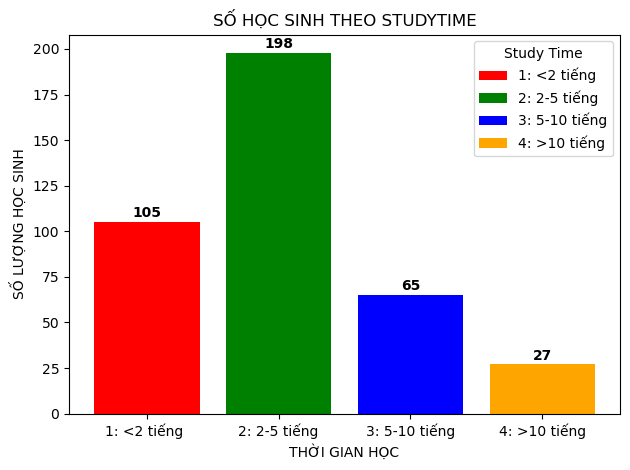

In [13]:
import matplotlib.pyplot as plt

# Dữ liệu đầu vào
group1 = math.filter(math.studytime == 1).count()
group2 = math.filter(math.studytime == 2).count()
group3 = math.filter(math.studytime == 3).count()
group4 = math.filter(math.studytime == 4).count()

studytime_rate = ["1: <2 tiếng ", "2: 2-5 tiếng", "3: 5-10 tiếng", "4: >10 tiếng"]
student_amount = [group1, group2, group3, group4]
colors = ['red', 'green', 'blue', 'orange']

# Vẽ biểu đồ cột
bars = plt.bar(studytime_rate, student_amount, color=colors)

# Ghi số lượng trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Thêm tiêu đề và nhãn
plt.xlabel("THỜI GIAN HỌC")
plt.ylabel("SỐ LƯỢNG HỌC SINH")
plt.title("SỐ HỌC SINH THEO STUDYTIME")

# Ghi chú (legend)
plt.legend(bars, studytime_rate, title="Study Time")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


    . Biểu đồ phân tán: studytime và G3, với màu sắc khác nhau cho nam (sex = 'M') và nữ (sex = 'F')

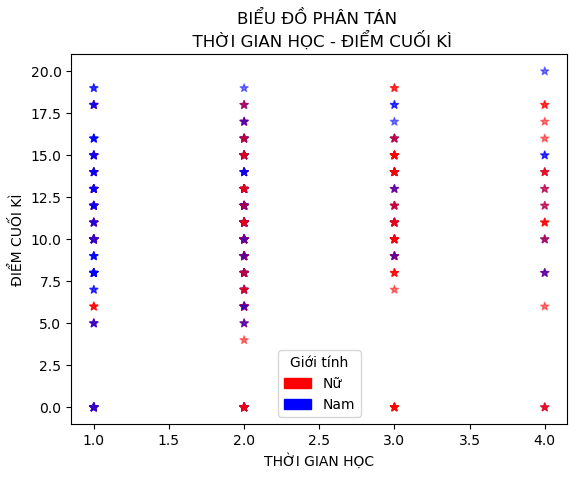

In [14]:

df_pandas = math.toPandas()

st = math.select('studytime').toPandas()
g3 = math.select('G3').toPandas()
sex = math.select('sex').toPandas()

df_pandas['sex_num'] = df_pandas['sex'].map({'F': 0, 'M': 1})

plt.scatter(x = st , y = g3 , 
            c=df_pandas['sex_num'].map({0: 'red', 1: 'blue'}), 
            marker='*',alpha=0.5,label="Dữ liệu điểm số")

# Append the label on X-axis
plt.xlabel("THỜI GIAN HỌC")
 
# Append the label on X-axis
plt.ylabel("ĐIỂM CUỐI KÌ")

# Add the title to graph
plt.title("BIỂU ĐỒ PHÂN TÁN \n  THỜI GIAN HỌC - ĐIỂM CUỐI KÌ ")


# Gắn chú thích đúng màu tương ứng
legend_labels = [
    mpatches.Patch(color='red', label='Nữ'),   # C0 là màu của giá trị 0
    mpatches.Patch(color='blue', label='Nam')   # C1 là màu của giá trị 1
]
plt.legend(handles=legend_labels, title="Giới tính")

# Display the chart
plt.show()

## ***b)Seaborn***

    . Implot: studytime và G3 với hue = 'sex'

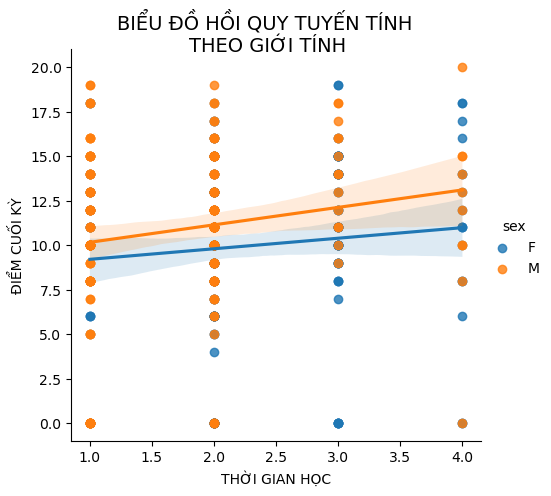

In [15]:

plot = sns.lmplot(x ='studytime', y ='G3', data = df_pandas, hue = 'sex')

# Ghi chú trục X và Y
plot.set_axis_labels("THỜI GIAN HỌC", "ĐIỂM CUỐI KỲ")

# Tiêu đề biểu đồ
plot.fig.suptitle("BIỂU ĐỒ HỒI QUY TUYẾN TÍNH \nTHEO GIỚI TÍNH", fontsize=14)

# Điều chỉnh vị trí tiêu đề cho không bị che
plot.fig.subplots_adjust(top=0.9)

#Show figure
plt.show()

    . Boxplot: Phân phối G3 theo studytime

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22380\2178131768.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df_pandas, palette='Set2')


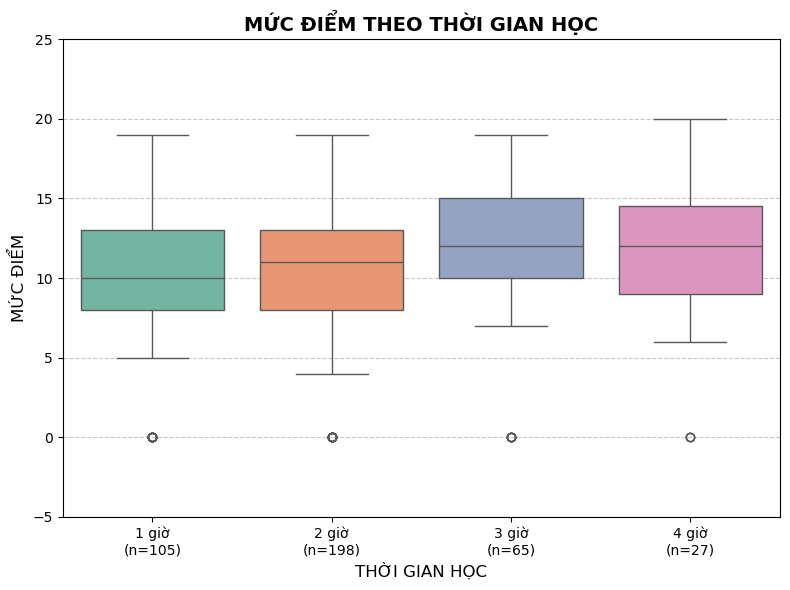

In [26]:


# Đếm số lượng học sinh cho từng mức studytime
counts = df_pandas['studytime'].value_counts().sort_index()

# Tạo nhãn mới với số lượng
labels = [f'{time} giờ\n(n={counts[time]})' for time in sorted(df_pandas['studytime'].unique())]

# Tạo boxplot với màu tùy chỉnh
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=df_pandas, palette='Set2')

# Gắn lại nhãn trục x với số lượng học sinh
plt.xticks(ticks=range(len(labels)), labels=labels)

# Cài đặt nhãn và tiêu đề
plt.title('MỨC ĐIỂM THEO THỜI GIAN HỌC', fontsize=14, fontweight='bold')
plt.xlabel('THỜI GIAN HỌC', fontsize=12)
plt.ylabel('MỨC ĐIỂM', fontsize=12)
plt.ylim(-5, 25)

# Thêm grid nhẹ
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


    . Pairplot: Mối quan hệ giữa G1, G2, G3, studytime

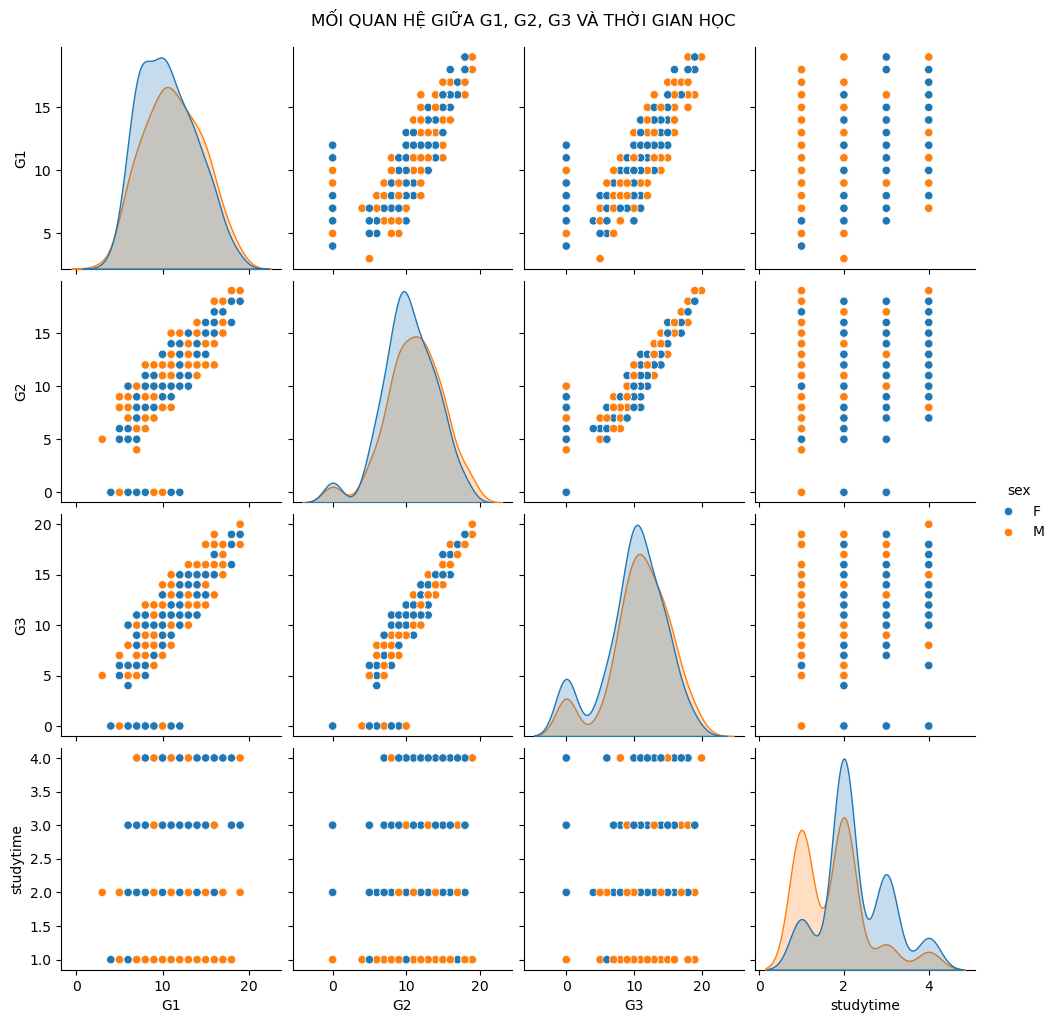

In [17]:

# Tạo pairplot
sns.pairplot(df_pandas[['G1', 'G2', 'G3', 'studytime', 'sex']], hue='sex')

# Thêm tiêu đề tổng cho toàn bộ biểu đồ
plt.suptitle('MỐI QUAN HỆ GIỮA G1, G2, G3 VÀ THỜI GIAN HỌC', y=1.02)

# Hiển thị biểu đồ
plt.show()


## ***c)Bokeh***

    . Biểu đồ phân tán tương tác: studytime và G3 với HoverTool hiển thị age, sex, absences

In [27]:
output_notebook()

df = df_pandas[['studytime', 'G3', 'age', 'sex', 'absences']]

# Tạo nguồn dữ liệu cho Bokeh
source = ColumnDataSource(df)

# Tạo biểu đồ
p = figure(width=500, height=350,
           title="BIỂU ĐỒ PHÂN TÁN TƯƠNG TÁC: STUDYTIME VS G3",
           x_axis_label='THỜI GIAN HỌC (STUDYTIME)',
           y_axis_label='ĐIỂM CUỐI KỲ (G3)',
           tools="pan,wheel_zoom,box_zoom,reset")

p.scatter(x="studytime", y="G3", 
               size=11, color="purple", alpha=0.7, 
               source=source)



# Thêm HoverTool để hiển thị thông tin
hover = HoverTool(tooltips=[
    ("Thời gian học", "@studytime"),
    ("Điểm cuối kỳ", "@G3"),
    ("Tuổi", "@age"),
    ("Giới tính", "@sex"),
    ("Vắng học", "@absences")
])
p.add_tools(hover)

# Hiển thị
show(p)

Loading BokehJS ...

    . Row layout: (1) Biểu đồ cột cho studytime, (2) Biểu đồ phân tán như trên

In [28]:
output_notebook()

# Tính số lượng theo studytime
count_study = df_pandas.groupby('studytime').size().reset_index(name='count')

# Tạo dữ liệu cho biểu đồ cột
source_bar = ColumnDataSource(data=dict(
    studytime=[str(x) for x in count_study['studytime']],
    count=count_study['count'],
    color=Bright3[:len(count_study)]
))

# Biểu đồ cột
bar_plot = figure(x_range=source_bar.data['studytime'], width=400, height=350,
                  title="SỐ LƯỢNG HỌC SINH THEO THỜI GIAN HỌC",
                  x_axis_label="THỜI GIAN HỌC", y_axis_label="SỐ LƯỢNG",
                  toolbar_location=None)

bar_plot.vbar(x='studytime', top='count', width=0.9, color='color', source=source_bar)

# Thêm nhãn số lượng
labels = LabelSet(x='studytime', y='count', text='count', y_offset=5,
                  text_align='center', source=source_bar)
bar_plot.add_layout(labels)

# Biểu đồ phân tán
df = df_pandas[['studytime', 'G3', 'age', 'sex', 'absences']]
source_scatter = ColumnDataSource(df)

scatter_plot = figure(width=500, height=350,
                      title="BIỂU ĐỒ PHÂN TÁN: STUDYTIME VS G3",
                      x_axis_label='THỜI GIAN HỌC', y_axis_label='ĐIỂM CUỐI KỲ',
                      tools="pan,wheel_zoom,box_zoom,reset")

scatter_plot.scatter(x="studytime", y="G3", size=10, color="green", alpha=0.7, source=source_scatter)

hover = HoverTool(tooltips=[
    ("Thời gian học", "@studytime"),
    ("Điểm cuối kỳ", "@G3"),
    ("Tuổi", "@age"),
    ("Giới tính", "@sex"),
    ("Vắng học", "@absences")
])
scatter_plot.add_tools(hover)

# Xếp hai biểu đồ theo hàng ngang
layout = row(bar_plot, scatter_plot)

# Hiển thị
show(layout)

Loading BokehJS ...

    . Tính năng ẩn/hiện cho nam hoặc nữ trong biểu đồ phân tán 

In [29]:

output_notebook()

# Giả sử df_pandas đã được chuẩn bị từ trước
# Chọn các cột cần thiết
df = df_pandas[['studytime', 'G3', 'age', 'sex', 'absences']]

# Tạo nguồn dữ liệu cho Bokeh
source = ColumnDataSource(df)

# Tạo biểu đồ
p = figure(width=500, height=350,
           title="Biểu đồ phân tán tương tác: Studytime vs G3",
           x_axis_label='Thời gian học (studytime)',
           y_axis_label='Điểm cuối kỳ (G3)',
           tools="pan,wheel_zoom,box_zoom,reset")

# Phân loại theo giới tính (M là Nam, F là Nữ)
colors = {'F': 'blue', 'M': 'red'}

# Thêm các điểm cho mỗi giới tính với màu sắc khác nhau
for sex, color in colors.items():
    subset = df[df["sex"] == sex]
    source_sex = ColumnDataSource(subset)
    p.scatter(x="studytime", y="G3", 
              size=10, color=color, alpha=0.7, 
              source=source_sex, legend_label=f"Giới tính {sex}")

# Thêm HoverTool để hiển thị thông tin
hover = HoverTool(tooltips=[
    ("Thời gian học", "@studytime"),
    ("Điểm cuối kỳ", "@G3"),
    ("Tuổi", "@age"),
    ("Giới tính", "@sex"),
    ("Vắng học", "@absences")
])
p.add_tools(hover)

# Thiết lập click policy cho Legend để ẩn/hiện các nhóm
p.legend.click_policy = "hide"

# Hiển thị biểu đồ
show(p)


Loading BokehJS ...

    . Thêm slider widget trong Bokeh để lọc studytime và cập nhật biểu đồ

In [30]:
from bokeh.layouts import column

output_notebook()

# Giả sử df_pandas đã được chuẩn bị từ trước
# Chọn các cột cần thiết
df = df_pandas[['studytime', 'G3', 'age', 'sex', 'absences']]

# Tạo nguồn dữ liệu cho Bokeh

sources = []
original_sources = []
colors = {'F': 'blue', 'M': 'red'}

# Tạo biểu đồ
p = figure(width=500, height=350,
           title="Biểu đồ phân tán tương tác: Studytime vs G3",
           x_axis_label='Thời gian học (studytime)',
           y_axis_label='Điểm cuối kỳ (G3)',
           tools="pan,wheel_zoom,box_zoom,reset")

# Thêm các điểm cho mỗi giới tính với màu sắc khác nhau
for sex, color in colors.items():
    subset = df[df["sex"] == sex]
    source = ColumnDataSource(subset)
    original_source = ColumnDataSource(subset)


    original_sources.append(original_source)
    sources.append(source)

    p.scatter(x="studytime", y="G3", 
              size=10, color=color, alpha=0.7, 
              source=source, legend_label=f"Giới tính {sex}")


# Slider lọc theo studytime
callback = CustomJS(args=dict(sources=sources, original_sources=original_sources), code="""
    var threshold = cb_obj.value;

    for (var i = 0; i < sources.length; i++) {
        var source = sources[i];
        var original_data = original_sources[i].data;
        var new_data = {studytime: [], G3: [], age: [], sex: [], absences: []};

        for (var j = 0; j < original_data['studytime'].length; j++) {
            if (original_data['studytime'][j] >= threshold) {
                new_data['studytime'].push(original_data['studytime'][j]);
                new_data['G3'].push(original_data['G3'][j]);
                new_data['age'].push(original_data['age'][j]);
                new_data['sex'].push(original_data['sex'][j]);
                new_data['absences'].push(original_data['absences'][j]);
            }
        }

        source.data = new_data;
        source.change.emit();
    }
""")

slider = Slider(start=int(df["studytime"].min()), 
                end=int(df["studytime"].max()), 
                value=int(df["studytime"].min()), 
                step=1, 
                title="Lọc theo Thời gian học (studytime)")
slider.js_on_change("value", callback)

# Thêm HoverTool để hiển thị thông tin
hover = HoverTool(tooltips=[
    ("Thời gian học", "@studytime"),
    ("Điểm cuối kỳ", "@G3"),
    ("Tuổi", "@age"),
    ("Giới tính", "@sex"),
    ("Vắng học", "@absences")
])
p.add_tools(hover)

# Thiết lập click policy cho Legend để ẩn/hiện các nhóm
p.legend.click_policy = "hide"

# Hiển thị biểu đồ
show(column(p, slider))



Loading BokehJS ...

## **CÔNG VIỆC 3: KIỂM ĐỊNH THỐNG KÊ VỚI GIẢ THUYẾT**


## ***a)T-Test***

    . Giả thuyết: "Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn hơn đáng kể so với học sinh có số ngày nghỉ thấp (absences <= trung bình)
    . Yêu cầu: Tạo hai nhóm dựa trên trung bình absences, thực hiện t-test, báo cáo p-value và kết luận (alpha = 0.05)

- Ta đặt: H0: Không có sự khác biệt điểm G3 giữa hai nhóm học sinh: nghỉ nhiều và nghỉ ít
- Ta đặt: H1: Điểm trung bình G3 của nhóm có số ngày nghỉ cao hơn mức trung bình thấp hơn đáng kể so với học sinh có số ngày nghỉ thấp.

| **Ký hiệu** | **Ý nghĩa**                                    | **Biến trong code**                             |
|-------------|------------------------------------------------|-------------------------------------------------|
| X̄₁ | Trung bình mẫu của nhóm 1 (nhóm học sinh nghỉ ít) | `group_low.mean()` (Nhóm học sinh có số buổi nghỉ ≤ trung bình)                             |
| X̄₂ | Trung bình mẫu của nhóm 2 (nhóm học sinh nghỉ nhiều) | `group_high.mean()` (Nhóm học sinh có số buổi nghỉ > trung bình)                            |
| s₁²   | Phương sai mẫu của nhóm 1 (nhóm học sinh nghỉ ít)  | `group_low.var(ddof=1)` (Phương sai mẫu của nhóm học sinh nghỉ ít)                        |
| s₂²   | Phương sai mẫu của nhóm 2 (nhóm học sinh nghỉ nhiều) | `group_high.var(ddof=1)` (Phương sai mẫu của nhóm học sinh nghỉ nhiều)                       |
| n₁     | Cỡ mẫu (số học sinh trong nhóm 1)             | `len(group_low)` (Số học sinh có số buổi nghỉ ≤ trung bình)                               |
| n₂     | Cỡ mẫu (số học sinh trong nhóm 2)             | `len(group_high)` (Số học sinh có số buổi nghỉ > trung bình)                              |
| t       | Giá trị t-statistic (kiểm định T)              | Tính toán trong `ttest_ind(group_high, group_low, equal_var=False)` (Kiểm định T giữa hai nhóm)                   |
| df      | Độ tự do (degrees of freedom)                  | Tính toán tự động trong `ttest_ind()` (Độ tự do tính toán từ cỡ mẫu và phương sai mẫu)         |
| p       | P-value (xác suất)                             | Tính toán trong `ttest_ind(group_high, group_low, equal_var=False)` (Giá trị P từ kiểm định T)                   |


### Giải thích mã

#### 1. `group_low = G3[absences <= mean_absences]`
- **Ý nghĩa**: Lọc nhóm học sinh có số buổi nghỉ ít hơn hoặc bằng trung bình (mean_absences).
- **Biến**: `group_low` là nhóm học sinh có ít buổi nghỉ.

#### 2. `group_high = G3[absences > mean_absences]`
- **Ý nghĩa**: Lọc nhóm học sinh có số buổi nghỉ nhiều hơn trung bình (mean_absences).
- **Biến**: `group_high` là nhóm học sinh có nhiều buổi nghỉ.

#### 3. `t_stat, p_value = ttest_ind(group_high, group_low, equal_var=False)`
- **Ý nghĩa**: Thực hiện kiểm định T hai mẫu độc lập giữa nhóm học sinh nghỉ nhiều và nhóm học sinh nghỉ ít. `equal_var=False` cho phép kiểm định không giả định phương sai của hai nhóm bằng nhau.
- **Biến**: `t_stat` là giá trị t-statistic và `p_value` là giá trị p từ kiểm định T.


In [31]:
df = df_pandas[[ 'absences','G3']]

absences = df["absences"]
G3 = df["G3"]

mean_absences = np.mean(absences)
print("Số lượng buổi nghỉ trung bình:", mean_absences)

group_no = G3[absences == 0]
group_low = G3[absences <= mean_absences]   # nghỉ ít
group_high = G3[absences > mean_absences]   # nghỉ nhiều

print(len(group_no),"Số lượng nhóm nghỉ ít:", len(group_low), "và số lượng nhóm nghỉ nhiều:",len(group_high))
no_mean = np.mean(group_no)
low_mean = np.mean(group_low)
high_mean = np.mean(group_high)

print("Trung bình điểm nhóm không nghỉ:",no_mean)
print("Trung bình điểm nhóm nghỉ ít:",low_mean)
print("Trung bình điểm nhóm nghỉ nhiều:",high_mean)

# T-test (2 mẫu độc lập)
t_stat, p_value = ttest_ind(group_high, group_low, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Kết luận
alpha = 0.05
if p_value < alpha:
    print("⇒ Bác bỏ H0: Có sự khác biệt G3 giữa học sinh nghỉ nhiều và nghỉ ít.")
else:
    print("⇒ Không bác bỏ H0: Không có bằng chứng cho thấy G3 khác biệt rõ.")

Số lượng buổi nghỉ trung bình: 5.708860759493671
115 Số lượng nhóm nghỉ ít: 249 và số lượng nhóm nghỉ nhiều: 146
Trung bình điểm nhóm không nghỉ: 8.443478260869565
Trung bình điểm nhóm nghỉ ít: 10.168674698795181
Trung bình điểm nhóm nghỉ nhiều: 10.835616438356164
T-statistic: 1.5676
P-value: 0.1178
⇒ Không bác bỏ H0: Không có bằng chứng cho thấy G3 khác biệt rõ.


## ***b)Z-Test***

    . Giả thuyết: "Trung bình điểm G3 của học sinh học ít (studytime <= 2) thì khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh ( giả định từ trung bình toàn mẫu.)"
    . Yêu cầu: Tính trung bình G3 của nhóm studytime <= 2, so sánh với trung bình toàn bộ, thực hiện z-test, báo cáo p-value và kết luận

- Ta đặt: H0: Trung bình điểm của học sinh học ít bằng trung bình toàn bộ học sinh.
- Ta đặt: H1: Điểm trung bình G3 của nhóm học ít thì khác biệt đáng kể so với trung 

| **Ký hiệu thống kê** | **Ý nghĩa**                                 | **Biến trong code**                       |
|----------------------|----------------------------------------------|-------------------------------------------|
|  x̄       | Trung bình mẫu (nhóm học ít)                | `x_bar = group_low.mean()`                |
|  μ           | Trung bình toàn bộ                         | `mu = df_pandas['G3'].mean()`             |
|  σ         | Độ lệch chuẩn toàn bộ                      | `sigma = df_pandas['G3'].std(ddof=0)`     |
|  n              | Cỡ mẫu (số học sinh học ít)                | `n = len(group_low)`                      |


### Giải thích về phép tính:

#### 1. Tính giá trị z:
$$
z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}
$$
- Đây là công thức tính giá trị **z-value**, dùng để chuẩn hóa sự khác biệt giữa trung bình mẫu x̄  và trung bình toàn bộ μ  so với độ lệch chuẩn σ  và cỡ mẫu n .
- Cách tính này giúp đánh giá xem sự khác biệt giữa mẫu và tổng thể có ý nghĩa thống kê hay không, thông qua một chỉ số chuẩn hóa.

#### 2. Tính p-value (hai đuôi):
$$
p = 2 \times (1 - \text{norm.cdf}(\left|z\right|))
$$
- `norm.cdf(abs(z))` tính giá trị hàm phân phối chuẩn (CDF) cho giá trị tuyệt đối của z.
- Sau đó, ta nhân với 2 để tính **p-value** cho kiểm định hai đuôi, với mục đích kiểm tra xem sự khác biệt có xảy ra ở cả hai phía của phân phối chuẩn hay không.


In [32]:
df = df_pandas[[ 'studytime','G3']]

group_low = df_pandas[df_pandas['studytime'] <= 2]['G3']

# Trung bình và độ lệch chuẩn của toàn bộ G3
mu = df_pandas['G3'].mean()
sigma = df_pandas['G3'].std(ddof=0)  # độ lệch chuẩn toàn bộ, dùng ddof=0

# Trung bình nhóm học ít
x_bar = group_low.mean()
n = len(group_low)

# Tính z-value
z = (x_bar - mu) / (sigma / np.sqrt(n))

# Tính p-value (hai đuôi)
p_value = 2 * (1 - norm.cdf(abs(z)))

# In kết quả
print(f"Trung bình toàn bộ: {mu:.4f}")
print(f"Trung bình nhóm học ít: {x_bar:.4f}")
print(f"Z-value: {z:.4f}")
print(f"P-value: {p_value:.4f}")

# Kết luận
alpha = 0.05
if p_value < alpha:
    print("⇒ Bác bỏ H0: Trung bình G3 của học sinh học ít khác biệt đáng kể so với toàn bộ.")
else:
    print("⇒ Không bác bỏ H0: Không có bằng chứng rõ ràng về sự khác biệt.")

Trung bình toàn bộ: 10.4152
Trung bình nhóm học ít: 10.1287
Z-value: -1.0898
P-value: 0.2758
⇒ Không bác bỏ H0: Không có bằng chứng rõ ràng về sự khác biệt.


## ***c)Chi-Square***

    . Giả thuyết: Có mối quan hệ giữa mức thời gian học (studytime) và việc đạt điểm cao (G3>=12) hay thấp (G3 < 12). 
    . Yêu cầu: Tạo biến nhị phân từ G3 (cao >= 12, thấp < 12), xây dựng bảng tần số (contingency table) giữa studytime và biến mới, thực hiện chi-square, báo cáo p-value và kết luận.

- H0 (Giả thuyết không): Không có mối quan hệ giữa thời gian học (studytime) và việc đạt điểm cao (G3 ≥ 12).

- H1 (Giả thuyết đối): Có mối quan hệ giữa thời gian học và việc đạt điểm cao

In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

# Bước 1: Tạo biến nhị phân từ cột G3 (1 nếu G3 >= 12, 0 nếu < 12)
df['G3_binary'] = (df['G3'] >= 12).astype(int)

# Kiểm tra thử vài dòng đầu
print(df[['studytime', 'G3', 'G3_binary']].head(20))

print("\n")

# Bước 2: Tạo bảng tần số giữa studytime và G3_binary
contingency_table = pd.crosstab(df['studytime'], df['G3_binary'])

# In bảng tần số
print("Bảng tần số:")
print(contingency_table)

print("\n")

# Bước 3: Thực hiện kiểm định Chi-square
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nKết quả kiểm định Chi-square:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies (tần số kỳ vọng nếu không có mối liên hệ):")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
print(f"p-value: {p_value:.4f}")

print("\n")

# Bước 4: Đưa ra kết luận
alpha = 0.05
print("Giả thuyết:")
print("H0: Không có mối quan hệ giữa thời gian học và việc đạt điểm cao (G3 ≥ 12).")
print("H1: Có mối quan hệ giữa thời gian học và việc đạt điểm cao (G3 ≥ 12).")

print("\n")

print("Kết luận kiểm định với mức ý nghĩa α = 0.05:")

if p_value < alpha:
    print("Vì p-value < 0.05, bác bỏ H0.")
    print("⇒ Kết luận: Có mối quan hệ giữa thời gian học và việc đạt điểm cao.")
else:
    print("Vì p-value ≥ 0.05, không đủ bằng chứng để bác bỏ H0.")
    print("⇒ Kết luận: Không tìm thấy mối quan hệ rõ ràng giữa thời gian học và việc đạt điểm cao.")

print("\n")

    studytime  G3  G3_binary
0           2   6          0
1           2   6          0
2           2  10          0
3           3  15          1
4           2  10          0
5           2  15          1
6           2  11          0
7           2   6          0
8           2  19          1
9           2  15          1
10          2   9          0
11          3  12          1
12          1  14          1
13          2  11          0
14          3  16          1
15          1  14          1
16          3  14          1
17          2  10          0
18          1   5          0
19          1  10          0


Bảng tần số:
G3_binary    0   1
studytime         
1           61  44
2          127  71
3           32  33
4           13  14



Kết quả kiểm định Chi-square:
Chi-square statistic: 6.0775
Degrees of freedom: 3
Expected frequencies (tần số kỳ vọng nếu không có mối liên hệ):
G3_binary           0          1
studytime                       
1           61.936709  43.063291
2          116.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22380\1431617141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['G3_binary'] = (df['G3'] >= 12).astype(int)


## **CÔNG VIỆC 4: PHÂN TÍCH VÀ BÁO CÁO**

## `Phần 1:` *Giới thiệu tập dữ liệu, lý do chọn file, mục tiêu phân tích*

# a) Giới thiệu tập dữ liệu

- Tập dữ liệu được sử dụng trong nghiên cứu này là **student-mat.csv**, được lấy từ **UCI Machine Learning Repository** – một nguồn dữ liệu uy tín được sử dụng rộng rãi trong cộng đồng nghiên cứu học máy và khoa học dữ liệu. Dữ liệu này tiếp cận thành tích của học sinh trong giáo dục trung học của hai trường Bồ Đào Nha. Các thuộc tính dữ liệu bao gồm điểm số của học sinh, nhân khẩu học, xã hội và các đặc điểm liên quan đến trường học và nó được thu thập bằng cách sử dụng các báo cáo và bảng câu hỏi của trường. Tập dữ liệu này chứa thông tin chi tiết về 395 học sinh đang học môn Toán tại hai trường trung học ở Bồ Đào Nha. Dữ liệu được thu thập trong khuôn khổ một nghiên cứu nhằm phân tích các yếu tố ảnh hưởng đến kết quả học tập của học sinh, được lưu với định dạng file CSV.

- Mỗi dòng dữ liệu đại diện cho một học sinh, với 33 đặc trưng (cột):

  + **G1, G2, G3**: Điểm số học kỳ 1, học kỳ 2, và học kỳ cuối (thang điểm 0–20).  
  + **studytime**: Thời gian học mỗi tuần  
    . 1: < 2 giờ  
    . 2: 2–5 giờ  
    . 3: 5–10 giờ  
    . 4: >10 giờ  
  + **absences**: Số ngày nghỉ học (từ 0 đến 93 ngày).  
  + **sex**: Giới tính học sinh (M: nam / F: nữ).  
  + **age**: Tuổi của học sinh (dao động từ 15 đến 22 tuổi).  
  + **freetime**: Thời gian rảnh rỗi (1–5 tiếng).  
  + **school**: Trường học sinh theo học:  
    . GP: Gabriel Pereira  
    . MS: Mousinho da Silvera  
  + **address**: Nơi ở của học sinh:  
    . U: “urban” là thành phố  
    . R: “rural” là nông thôn  
  + **famsize**: Số lượng thành viên trong gia đình:  
    . GT3: “greater than 3” có nghĩa là nhiều hơn hoặc bằng 3 thành viên  
    . LE3: “less than 3” có nghĩa là ít hơn hoặc bằng 3 thành viên  
  + **Pstatus**: Tình trạng sống cùng phụ huynh:  
    . A: Không sống cùng nhau  
    . T: Sống cùng nhau  
  + **Medu, Fedu**: Trình độ học vấn của phụ huynh (cha hoặc mẹ):  
    . 0: Không đi học, chỉ có hai trường hợp của hai học sinh khác nhau  
    . 1: Đi học hết cấp 1 (từ lớp 1 – lớp 5)  
    . 2: Đi học hết cấp 2 (từ lớp 6 – lớp 9)  
    . 3: Đi học hết cấp 3 (từ lớp 10 – lớp 12)  
    . 4: Đi học hết đại học (4 năm)  
  + **Mjob, Fjob**: Công việc của phụ huynh  
    . at_home: Công việc tại nhà  
    . teacher: Giáo viên  
    . services: Làm phục vụ, dịch vụ  
    . health: Làm về y khoa, mảng sức khỏe  
    . other: Các ngành nghề khác  
  + **reason**: Lý do chọn ngôi trường để theo học:  
    . course: Do chương trình, khóa học  
    . home: Lý do gần nhà  
    . reputation: Danh tiếng của ngôi trường  
    . other: Các lý do khách quan khác  
  + **guardian**: Người giám hộ của học sinh là cha hoặc mẹ (father / mother)  
  + **traveltime**: Thời gian đi đến trường của học sinh:  
    . 1: <15 phút  
    . 2: 15–30 phút  
    . 3: 30 phút – 1 tiếng  
    . 4: >1 tiếng  
  + **failures**: Số lần học sinh rớt lớp trước đó từ 0 – 3 lớp  
  + **schoolsup, famsup**: Hỗ trợ học tập từ gia đình và nhà trường (yes / no)  
  + **paid**: Lớp học thêm có cần phải trả thêm học phí không (yes / no)  
  + **activities**: Hoạt động ngoại khóa (yes / no)  
  + **nursery**: Có học trường mẫu giáo không (yes / no)  
  + **higher**: Dự định muốn học cao hơn (yes / no)  
  + **internet**: Có kết nối internet ở nhà (yes / no)  
  + **romantic**: Có mối quan hệ tình cảm (yes / no)  
  + **famrel**: Tình trạng mối quan hệ trong gia đình (từ 1 là rất tệ đến 5 là rất tốt)  
  + **goout**: Đi ra ngoài chơi với bạn bè (từ 1 là rất ít đến 5 là rất nhiều)  
  + **Dalc**: Tiêu thụ rượu trong ngày làm việc (từ 1 là rất ít đến 5 là rất nhiều)  
  + **Walc**: Tiêu thụ rượu vào cuối tuần (từ 1 là rất ít đến 5 là rất nhiều)  
  + **health**: Tình trạng sức khỏe của học sinh (từ 1 là rất kém đến 5 là rất khỏe)

---

# b) Lý do chọn file student-mat.csv cho việc phân tích môn Toán

Trong bối cảnh giáo dục hiện đại ngày càng chú trọng đến việc cá nhân hóa quá trình học tập và đưa ra các quyết định dựa trên dữ liệu, việc lựa chọn một bộ dữ liệu phù hợp là bước đầu tiên và quan trọng nhất để đảm bảo chất lượng của quá trình phân tích. Dữ liệu student-mat.csv đã được tôi lựa chọn làm cơ sở nghiên cứu vì các lý do sau:

1. **Tập trung sâu vào một môn học cụ thể**:  
Không giống như những bộ dữ liệu tổng hợp về kết quả học tập nhiều môn học khác nhau, “student-mat.csv” tập trung chuyên biệt vào môn Toán – một môn học được xem là nền tảng cho tư duy logic, phân tích và giải quyết vấn đề. Việc chỉ phân tích một môn học giúp loại bỏ các yếu tố gây nhiễu từ các môn khác, từ đó cho phép đi sâu vào việc tìm hiểu nguyên nhân và tác động cụ thể đến hiệu quả học tập của học sinh trong môn Toán.

2. **Bức tranh toàn diện về học sinh**:  
Một điểm nổi bật khác của bộ dữ liệu là sự kết hợp giữa dữ liệu học tập và dữ liệu phi học thuật. Bên cạnh các điểm số học kỳ (G1, G2, G3), tập dữ liệu còn ghi nhận các yếu tố như tình trạng gia đình, nghề nghiệp của cha mẹ, mức độ tiêu thụ rượu, thói quen học tập, thời gian rảnh rỗi và tình trạng đi học chuyên cần. Điều này mang đến một góc nhìn đa chiều, giúp tôi có thể khám phá những mối liên hệ tiềm ẩn giữa yếu tố xã hội và kết quả học tập, từ đó có thể đưa ra các hướng can thiệp chính sách giáo dục toàn diện.

3. **Tính ứng dụng cao trong thực tiễn giáo dục**:  
Với thông tin phong phú và chân thực, tập dữ liệu student-mat.csv không chỉ phù hợp để phục vụ các mô hình dự đoán học máy mà còn rất hữu ích cho các nghiên cứu giáo dục ứng dụng, chẳng hạn như thiết kế chương trình hỗ trợ học sinh yếu, điều chỉnh phương pháp giảng dạy phù hợp với từng nhóm học sinh, hoặc tư vấn học đường dựa trên dữ liệu. Như vậy, các kết quả rút ra từ tập dữ liệu này không chỉ mang tính học thuật mà còn có thể chuyển hóa thành các chiến lược cải thiện học tập thực tế.

4. **Khả năng theo dõi tiến trình học tập**:  
Việc bộ dữ liệu bao gồm cả ba giai đoạn điểm số (G1 – đầu kỳ, G2 – giữa kỳ, G3 – cuối kỳ) cho phép xây dựng một phát họa cụ thể theo thời gian về sự tiến bộ hoặc thụt lùi trong học tập của từng học sinh. Đây là một đặc điểm cực kỳ quý giá khi nghiên cứu về quá trình học tập, vì nó cho phép kiểm tra không chỉ kết quả cuối cùng mà còn cả quá trình phát triển và động lực học tập của học sinh.

5. **Tính sẵn sàng và minh bạch**:  
Dữ liệu được cung cấp công khai, có nguồn gốc rõ ràng, đã được sử dụng trong nhiều nghiên cứu trước đó, tạo điều kiện cho việc so sánh, kiểm định và tái sử dụng mô hình, đồng thời đảm bảo tính minh bạch và đáng tin cậy trong toàn bộ quá trình nghiên cứu.

> **=> Chính nhờ những đặc điểm nổi bật kể trên, tập dữ liệu “student-mat.csv” trở thành một lựa chọn lý tưởng cho việc phân tích và dự đoán kết quả học tập môn Toán.**  
> Thông qua đó, chúng ta không chỉ có thể hiểu rõ hơn về các yếu tố ảnh hưởng đến thành tích học tập của học sinh, mà còn có thể đề xuất các giải pháp thiết thực nhằm nâng cao chất lượng giảng dạy và tối ưu hóa quá trình học tập trong nhà trường.

---

# c) Mục tiêu phân tích

- Khám phá mối tương quan giữa **thời gian học tập**, **số ngày nghỉ** và **thời gian rảnh** với kết quả học tập môn Toán, nhằm xác định các yếu tố đó theo thời gian có ảnh hưởng tích cực hoặc tiêu cực đến thành tích học tập của học sinh.

- Phân tích tác động của các yếu tố **phi học thuật**, chẳng hạn như mức độ vắng mặt và thói quen sử dụng thời gian rảnh đến việc sử dụng thức uống có cồn,... để từ đó đánh giá vai trò của **kỷ luật học tập và cân bằng sinh hoạt** trong quá trình học.

- Đề xuất các biện pháp **cải thiện kết quả học tập dựa trên dữ liệu thực tế và kiểm định thống kê**, giúp nhà trường và giáo viên định hướng chiến lược giảng dạy hiệu quả hơn, đồng thời hỗ trợ học sinh phát triển thói quen học tập khoa học và hợp lý.


## `Phần 2:` *Mô tả cách tạo 3 biểu đồ, lý do chọn, xử lý dữ liệu* 

- Biểu đồ cột - thư viện Matplotlib: Để tạo biểu đồ cột cho dữ liệu nhằm so sánh giữa số lượng học sinh theo 'studytime' cần làm các bước sau:
    + Import thư viện `matplotlib.pyplot` vào hệ thống.
    + Theo thống kê thời gian học của học sinh dao động từ 1-4 giờ nên ta có thể chia thành 4 cột theo từng thời gian.
    + Đếm số lượng học sinh với từng điều kiện thời gian thông qua câu lệnh `filter`. VD: `group1 = math.filter(math.studytime == 1).count()`.
    + Ta gán các giá trị tìm được vào trục hoành và trục tung. Sử dụng câu lệnh của thư viện để tạo biểu đồ. VD:
        + studytime_rate = ["1 hour", "2 hours", "3 hours", "4 hours"]
        + student_amount = [group1,group2,group3,group4]
        + plt.bar(studytime_rate,student_amount)
    + Đặt tên cho trục x và trục y và tiêu đề cho biểu đồ.

- Biểu đồ implot - thư viện Seaborn: Để tạo dữ liệu biểu đồ hồi quy tuyến tính theo giới tính và phân bố của thời gian học (studytime) và điểm cuối kì (G3)
    + Import thư viện `seaborn` vào hệ thống. Với trục hoành là studytime, trục tung là G3 và phân biệt các điểm dữ liệu theo giới tính (sex) `hue='sex'`
    + Đặt tên cho trục hoành và trục tung. VD: `plot.set_axis_labels("THỜI GIAN HỌC", "ĐIỂM CUỐI KỲ")`
    + Đăt tên cho tiêu đề của biểu đồ. VD: `plot.fig.suptitle("BIỂU ĐỒ HỒI QUY TUYẾN TÍNH \nTHEO GIỚI TÍNH", fontsize=14)`
    + Để tránh cho tiêu đề bị đè lên biểu đồ, ta dùng câu lệnh sau: `plot.fig.subplots_adjust(top=0.9)` với khả năng nâng dòng chữ lên.

- Biểu đồ phân tán tương tác - thư viện Bokeh: Để tạo dữ liệu với biểu đồ phân tán tương tác thể hiện dữ liệu giữa: studytime và G3 với HoverTool hiển thị age, sex, absences. 
    + Import thư viện `bokeh` vào hệ thống, kèm với đó là các thành phần cần thiết như: figure, output_notebook, HoverTool.
    + **`output_notebook()`**: Hàm này được sử dụng để hiển thị các biểu đồ Bokeh trực tiếp trong Jupyter Notebook. Khi sử dụng Bokeh trong Jupyter Notebook, bạn cần gọi hàm này để hiển thị các biểu đồ thay vì sử dụng `output_file()`.
    + Tập dữ liệu được lấy từ các cột sau: 'studytime', 'G3', 'age', 'sex', 'absences' và chuyển thành dữ liệu pandas. Tạo datasource từ tập dữ liệu đó.
    + Tạo khung biểu đồ: 
        - **`width=500`**: Đặt chiều rộng của biểu đồ là 500 pixels.
        - **`height=350`**: Đặt chiều cao của biểu đồ là 350 pixels.
        - **`title="BIỂU ĐỒ PHÂN TÁN TƯƠNG TÁC: STUDYTIME VS G3"`**: Đặt tiêu đề của biểu đồ là "BIỂU ĐỒ PHÂN TÁN TƯƠNG TÁC: STUDYTIME VS G3".
        - **`x_axis_label='THỜI GIAN HỌC (STUDYTIME)'`**: Đặt tên cho trục X là "THỜI GIAN HỌC (STUDYTIME)".
        - **`y_axis_label='ĐIỂM CUỐI KỲ (G3)'`**: Đặt tên cho trục Y là "ĐIỂM CUỐI KỲ (G3)".
        - **`tools="pan,wheel_zoom,box_zoom,reset"`**: Định nghĩa các công cụ tương tác cho biểu đồ:
        - **`pan`**: Cho phép kéo biểu đồ.
        - **`wheel_zoom`**: Cho phép phóng to/thu nhỏ bằng cách sử dụng bánh xe chuột.
        - **`box_zoom`**: Cho phép phóng to khu vực được chọn bằng chuột.
        - **`reset`**: Cho phép quay lại trạng thái ban đầu của biểu đồ.
    + Tạo biểu đồ: 
        - **`x="studytime"`**: Xác định dữ liệu của trục X là cột `studytime` trong `source`.
        - **`y="G3"`**: Xác định dữ liệu của trục Y là cột `G3` trong `source`.
        - **`size=11`**: Đặt kích thước của các điểm trên biểu đồ.
        - **`color="green"`**: Đặt màu của các điểm là màu xanh lá cây.
        - **`alpha=0.7`**: Đặt độ trong suốt của các điểm, giá trị từ 0 (hoàn toàn trong suốt) đến 1 (hoàn toàn không trong suốt).
        - **`source=source`**: Cung cấp nguồn dữ liệu cho biểu đồ từ đối tượng `ColumnDataSource` đã tạo ở bước trước.
    + Thêm chức năng:
        - **`tooltips`**: Là danh sách các thông tin hiển thị khi di chuột qua một điểm dữ liệu. Các thông tin này được định nghĩa dưới dạng các cặp khóa-giá trị:
        - **"Thời gian học", "@studytime"**: Hiển thị thời gian học của học sinh.
        - **"Điểm cuối kỳ", "@G3"**: Hiển thị điểm cuối kỳ của học sinh.
        - **"Tuổi", "@age"**: Hiển thị tuổi của học sinh.
        - **"Giới tính", "@sex"**: Hiển thị giới tính của học sinh.
        - **"Vắng học", "@absences"**: Hiển thị số lần vắng học của học sinh.
        - **`p.add_tools(hover)`**: Thêm công cụ Hover vào biểu đồ `p` để hiển thị thông tin khi di chuột qua các điểm dữ liệu.

## **Biểu đồ cột - thư viện Matplotlib**: *Để tạo biểu đồ cột cho dữ liệu nhằm so sánh giữa số lượng học sinh theo 'studytime' cần làm các bước sau*:

| **Bước** | **Mô Tả**                                                                                                                                                          |
|----------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **1. Import thư viện** | Import thư viện `matplotlib.pyplot` vào hệ thống.                                                                                                             |
| **2. Chia cột theo thời gian học** | Theo thống kê, thời gian học dao động từ 1-4 giờ nên ta chia thành 4 cột theo từng thời gian.                                                             |
| **3. Đếm số lượng học sinh** | Đếm số lượng học sinh với từng điều kiện thời gian thông qua câu lệnh `filter`. Ví dụ: `group1 = math.filter(math.studytime == 1).count()`.            |
| **4. Gán giá trị cho trục** | Gán các giá trị tìm được vào trục hoành và trục tung. Câu lệnh ví dụ: <br> `studytime_rate = ["1 hour", "2 hours", "3 hours", "4 hours"]` <br> `student_amount = [group1, group2, group3, group4]`. |
| **5. Tạo biểu đồ** | Sử dụng `plt.bar(studytime_rate, student_amount)` để tạo biểu đồ cột.                                                                                         |
| **6. Đặt tên cho trục và tiêu đề** | Đặt tên cho trục X, trục Y và tiêu đề cho biểu đồ.                                                                                                          |


## **Biểu đồ implot - thư viện Seaborn**: *Để tạo dữ liệu biểu đồ hồi quy tuyến tính theo giới tính và phân bố của thời gian học (studytime) và điểm cuối kì (G3)*

| **Bước** | **Mô Tả**                                                                                                                                                          |
|----------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **1. Import thư viện** | Import thư viện `seaborn` vào hệ thống.                                                                                                                          |
| **2. Xác định trục và phân biệt giới tính** | Trục hoành là `studytime`, trục tung là `G3`, và phân biệt các điểm dữ liệu theo giới tính (sex) sử dụng `hue='sex'`.                                          |
| **3. Đặt tên cho trục** | Đặt tên cho trục X và trục Y. Ví dụ: `plot.set_axis_labels("THỜI GIAN HỌC", "ĐIỂM CUỐI KỲ")`.                                                               |
| **4. Đặt tiêu đề cho biểu đồ** | Đặt tiêu đề cho biểu đồ. Ví dụ: `plot.fig.suptitle("BIỂU ĐỒ HỒI QUY TUYẾN TÍNH \nTHEO GIỚI TÍNH", fontsize=14)`.                                                |
| **5. Điều chỉnh vị trí tiêu đề** | Để tránh tiêu đề bị đè lên biểu đồ, sử dụng `plot.fig.subplots_adjust(top=0.9)` để nâng dòng chữ lên.                                                           |


## **Biểu đồ phân tán tương tác - thư viện Bokeh**: *Để tạo dữ liệu với biểu đồ phân tán tương tác thể hiện dữ liệu giữa: studytime và G3 với HoverTool hiển thị age, sex, absences.* 

| **Bước** | **Mô Tả**                                                                                                                                                                 |
|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **1. Import thư viện** | Import thư viện `bokeh` vào hệ thống cùng với các thành phần cần thiết như `figure`, `output_notebook`, `HoverTool`.                                                |
| **2. Sử dụng output_notebook()** | Sử dụng hàm `output_notebook()` để hiển thị biểu đồ trực tiếp trong Jupyter Notebook. Đảm bảo biểu đồ hiển thị đúng trên notebook thay vì file.                |
| **3. Chuẩn bị dữ liệu** | Tập dữ liệu lấy từ các cột: 'studytime', 'G3', 'age', 'sex', 'absences' và chuyển thành dữ liệu pandas. Tạo `ColumnDataSource` từ dữ liệu này.                        |
| **4. Tạo khung biểu đồ** | Tạo khung biểu đồ với các tham số sau:                                                                                                                                 |
|          | - **`width=500`**: Đặt chiều rộng của biểu đồ là 500 pixels.                                                                                                             |
|          | - **`height=350`**: Đặt chiều cao của biểu đồ là 350 pixels.                                                                                                            |
|          | - **`title="BIỂU ĐỒ PHÂN TÁN TƯƠNG TÁC: STUDYTIME VS G3"`**: Đặt tiêu đề cho biểu đồ.                                                                                   |
|          | - **`x_axis_label='THỜI GIAN HỌC (STUDYTIME)'`**: Đặt tên cho trục X là "THỜI GIAN HỌC (STUDYTIME)".                                                                   |
|          | - **`y_axis_label='ĐIỂM CUỐI KỲ (G3)'`**: Đặt tên cho trục Y là "ĐIỂM CUỐI KỲ (G3)".                                                                                   |
|          | - **`tools="pan,wheel_zoom,box_zoom,reset"`**: Định nghĩa các công cụ tương tác.                                                                                         |
| **5. Tạo biểu đồ phân tán** | Tạo biểu đồ phân tán với các tham số sau:                                                                                                                              |
|          | - **`x="studytime"`**: Xác định dữ liệu trục X là `studytime`.                                                                                                          |
|          | - **`y="G3"`**: Xác định dữ liệu trục Y là `G3`.                                                                                                                          |
|          | - **`size=11`**: Đặt kích thước của các điểm.                                                                                                                              |
|          | - **`color="green"`**: Đặt màu của các điểm là màu xanh lá cây.                                                                                                          |
|          | - **`alpha=0.7`**: Đặt độ trong suốt của các điểm (0 là trong suốt hoàn toàn, 1 là không trong suốt).                                                                  |
|          | - **`source=source`**: Cung cấp dữ liệu cho biểu đồ từ `ColumnDataSource`.                                                                                               |
| **6. Thêm công cụ Hover** | Thêm công cụ Hover để hiển thị thông tin khi di chuột qua các điểm dữ liệu:                                                                                          |
|          | - **`tooltips`**: Danh sách các thông tin hiển thị:                                                                                                                     |
|          |   - **"Thời gian học", "@studytime"**: Hiển thị thời gian học.                                                                                                        |
|          |   - **"Điểm cuối kỳ", "@G3"**: Hiển thị điểm cuối kỳ.                                                                                                                  |
|          |   - **"Tuổi", "@age"**: Hiển thị tuổi học sinh.                                                                                                                         |
|          |   - **"Giới tính", "@sex"**: Hiển thị giới tính học sinh.                                                                                                              |
|          |   - **"Vắng học", "@absences"**: Hiển thị số lần vắng học.                                                                                                            |
|          | - **`p.add_tools(hover)`**: Thêm công cụ Hover vào biểu đồ để hiển thị thông tin khi di chuột qua điểm dữ liệu.                                                         |


## **Lý do chọn biểu đồ**:

### 1. **Biểu đồ cột - Matplotlib**

* **Mục đích**: Biểu đồ cột được sử dụng nhằm trực quan hóa số lượng học sinh tương ứng với từng mức độ thời gian học trong tuần, từ đó hỗ trợ phân tích xu hướng và sự phân bố của học sinh theo mức độ đầu tư thời gian vào việc học..
    
* **Lý do chọn**:
    * **Dễ hiểu và trực quan**: •	Dễ hiểu và trực quan: Biểu đồ cột thể hiện rõ ràng sự so sánh giữa các nhóm thời gian học khác nhau (từ <2 giờ đến >10 giờ mỗi tuần).
    * **Tính đơn giản**: Khi làm việc với dữ liệu phân loại, như thời gian học, biểu đồ cột sẽ giúp minh họa rõ ràng sự phân bố và tỷ lệ học sinh theo từng mức độ thời gian học.
    * **Hiệu quả khi phân nhóm dữ liệu**: Dễ dàng nhận thấy sự khác biệt giữa các nhóm thời gian học mà không cần phải làm phức tạp hóa dữ liệu.

### 2. **Biểu đồ hồi quy tuyến tính - Seaborn**

* **Mục đích**: Biểu đồ hồi quy tuyến tính giúp **phân tích mối quan hệ tuyến tính** giữa hai biến số, trong trường hợp này là `studytime` và `G3`.
    
* **Lý do chọn**:
    * **Tìm hiểu mối quan hệ giữa các biến**: Biểu đồ hồi quy tuyến tính cho phép chúng ta hiểu mối quan hệ giữa thời gian học và điểm cuối kỳ (G3) của học sinh, đặc biệt khi phân biệt theo giới tính.
    * **Đơn giản hóa phân tích**: Mối quan hệ giữa `studytime` và `G3` có thể không phải là tuyến tính hoàn toàn, nhưng việc sử dụng hồi quy tuyến tính vẫn giúp xác định xu hướng chính.
    * **Hỗ trợ phân loại**: Việc sử dụng phân biệt theo giới tính (hue='sex') giúp ta hiểu rõ hơn sự khác biệt về điểm số và thời gian học giữa hai giới.

### 3. **Biểu đồ phân tán tương tác - Bokeh**

* **Mục đích**: Biểu đồ phân tán tương tác thể hiện dữ liệu phân tán và giúp người dùng **khám phá dữ liệu một cách trực quan** thông qua tương tác (di chuột).
    
* **Lý do chọn**:
    * **Tương tác trực tiếp**: Sử dụng Bokeh cho phép người dùng tương tác với biểu đồ, giúp họ khám phá thêm thông tin chi tiết về từng điểm dữ liệu (như tuổi, giới tính, số lần vắng học) khi di chuột qua các điểm.
    * **Hiển thị nhiều thông tin**: Thông qua công cụ Hover, người dùng có thể dễ dàng truy cập các thông tin bổ sung như tuổi, giới tính, và số lần vắng học, từ đó cung cấp cái nhìn sâu sắc về mối quan hệ giữa thời gian học và điểm số.
    * **Thích hợp cho phân tích phức tạp**: Khi có nhiều yếu tố ảnh hưởng đến kết quả học tập, như số lần vắng học hay tuổi tác, biểu đồ phân tán tương tác sẽ giúp làm rõ các mối liên hệ này và giúp người dùng đưa ra quyết định dễ dàng hơn.


## `Phần 3:` Phân tích xu hướng từ biểu đồ 

## Phân tích các biểu đồ

---

### **Biểu đồ cột**

- Dựa vào biểu đồ cột đã trình bày phía trên, biểu đồ thể hiện rõ ràng về khả năng tập trung học của học sinh thông qua số lượng được thống kê theo từng mốc thời gian:  
  	+ Tổng số lượng học sinh là 395 được phân chia thành các mốc thời gian học: Nhóm 1 (< 2 tiếng), nhóm 2 (2-5 tiếng), nhóm 3 (5-10 tiếng), 4 (>10 tiếng).
  	+ Số lượng học sinh tập trung ở mức 2 chiếm tỉ lệ cao nhất khoảng 50,13% (198 học sinh). Cho thấy đây là khoảng thời gian học tập phổ biến nhất.  
  	+ Mốc thời gian học có tỉ lệ thấp nhất nằm ở mức 4 chỉ chiếm một phần nhỏ là 6.84% (27 học sinh).  
  	+ Hai nhóm còn lại có tỷ lệ lần lượt là 26,58% (mức 1) và 16,46% (mức 3), với sự chênh lệch đáng kể khoảng 10,12% giữa hai nhóm này.

> => Kết quả này cho thấy phần lớn học sinh lựa chọn học trong khoảng thời gian vừa phải (2 tiếng), có thể là do đây là mốc thời gian cân bằng giữa hiệu quả và khả năng duy trì sự tập trung, đồng thời không gây cảm giác quá tải trong học tập.

---

### **Biểu đồ hồi quy tuyến tính**

- Biểu đồ này tận dụng cột dữ liệu giới tính để phân tích mối quan hệ giữa điểm số cuối kì với thời lượng học tập của mỗi cá nhân như sau:  
  	+ Biểu đồ này cho thấy mối quan hệ tích cực giữa thời gian học và điểm cuối kì. Dựa vào biểu đồ trên, ta có thể quan sát thấy rằng với số giờ học càng cao thì điểm số sẽ càng cao.  
  	+ Đặc biệt, đường hồi quy màu cam (nam) luôn nằm phía trên so với đường màu xanh dương (nữ), cho thấy trong cùng một thời lượng học tập, nam sinh có xu hướng đạt điểm số cao hơn nữ sinh.  
  	+ Tuy nhiên, các điểm dữ liệu vẫn có sự phân tán lớn, biểu hiện bằng việc xuất hiện những học sinh học nhiều nhưng điểm số vẫn thấp, cho thấy thời gian học chỉ là một trong nhiều yếu tố ảnh hưởng đến kết quả học tập.

> => Kết luận được đưa ra rằng, với thời gian học càng cao thì điểm số của học sinh cũng được cải thiện đáng kể. Cùng với đó nam sinh có xu hướng đạt điểm cao hơn với nữ sinh ở cùng một mức học. Đây là hai xu hướng chung được thể hiện trong biểu đồ trên.

---

### **Biểu đồ phân tán tương tác**

- Biểu đồ phân tán tương tác mô tả mối quan hệ giữa thời gian học tập (studytime) và điểm số cuối kỳ (G3). Mỗi điểm tròn đại diện cho một học sinh.  
  	+ Nhìn chung thì những học sinh có thời gian học cao hơn thì có xu hướng đạt điểm cuối kì cao hơn so với nhóm học ít.  
  	+ Ở nhóm học sinh chỉ học ở mức 1–2, điểm số có sự phân tán mạnh, trải rộng từ 0 đến 19 điểm. Điều này phản ánh tính không ổn định trong kết quả học tập của nhóm này.  
  	+ Ngược lại, nhóm học mức 3–4 thể hiện sự tập trung điểm số cao hơn, ít xuất hiện học sinh điểm thấp. Các điểm dữ liệu tập trung hơn về phía trên, cho thấy kết quả học ổn định và hiệu quả hơn.

> => Biểu đồ này làm nổi bật xu hướng rằng, điểm số ở mức thời gian học ít (mức 1-2) thường được phân bố đều ở các mức điểm từ 0 đến 19 điểm, nhưng điểm cao vẫn chỉ chiếm số lượng nhỏ. Bên cạnh đó, với thời lượng học cao thì mức điểm thấp ít dần đi, mật độ điểm cao dày đặc hơn dao động từ 10 đến 20, tuy nhiên vẫn có các ngoại lệ.


## `Phần 4:` Đề xuất phương pháp cải thiện phương pháp học

## a) Phương pháp 1

- Tăng thời gian trung bình học lên từ dưới 2 tiếng đến 2-5 tiếng thành 5-10 tiếng hoặc trên 10 tiếng nhằm cải thiện điểm số. Vì theo thống kê qua các dữ liệu biểu đồ ta thấy được với mức thời gian học càng cao thì điểm cuối kì cũng được tăng lên đáng kể.


In [35]:
output_notebook()

df = df_pandas[['studytime', 'G3', 'age', 'sex', 'absences']]

# Tạo nguồn dữ liệu cho Bokeh
source = ColumnDataSource(df)

# Tạo biểu đồ
p = figure(width=500, height=350,
           title="BIỂU ĐỒ PHÂN TÁN TƯƠNG TÁC: STUDYTIME VS G3",
           x_axis_label='THỜI GIAN HỌC (STUDYTIME)',
           y_axis_label='ĐIỂM CUỐI KỲ (G3)',
           tools="pan,wheel_zoom,box_zoom,reset")

p.scatter(x="studytime", y="G3", 
               size=11, color="purple", alpha=0.7, 
               source=source)



# Thêm HoverTool để hiển thị thông tin
hover = HoverTool(tooltips=[
    ("Thời gian học", "@studytime"),
    ("Điểm cuối kỳ", "@G3"),
    ("Tuổi", "@age"),
    ("Giới tính", "@sex"),
    ("Vắng học", "@absences")
])
p.add_tools(hover)

# Hiển thị
show(p)

Loading BokehJS ...

+ Giải thích: 
    - Ở mức thời gian học cao hơn thì mức dao động điểm G3 của học sinh cũng cao hơn đáng kể.
    - Theo biểu đồ cho thấy: mức 2-5 đến 5-10 tiếng học thì dao động điểm trải dài từ 5-19 điểm nhưng ở mức trên 10 tiếng học điểm dao động được cải thiện hơn từ 10-20 điểm.


## b) Phương pháp 2


+ Với số điểm trung bình của nhóm học sinh có tổng buổi nghỉ trung bình dao động từ 1-6 buổi vẫn có sự chênh lệch đáng kể hơn với nhóm nghỉ nhiều trên 6 buổi. Đây là dữ liệu cho lý giải trên:

***Điểm trung bình cuối kì của các nhóm học sinh có buổi nghỉ khác nhau***

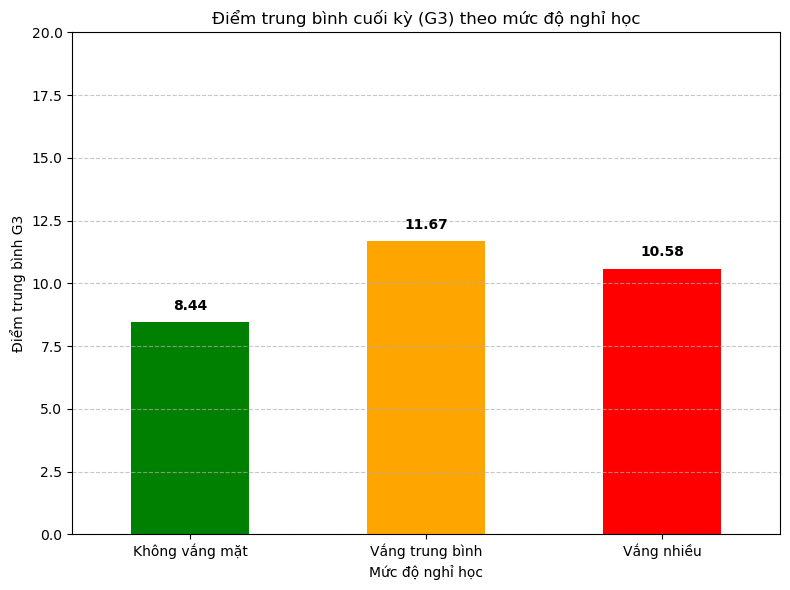

In [34]:
df_pandas = math.toPandas()

def classify_absences(absences):
    if absences == 0:
        return 'Không vắng mặt'
    elif 1 <= absences <= 6:
        return 'Vắng trung bình'
    else:
        return 'Vắng nhiều'

df_pandas['Mức độ nghỉ'] = df_pandas['absences'].apply(classify_absences)

# Tính điểm trung bình G3 cho mỗi mức độ nghỉ
grouped = df_pandas.groupby('Mức độ nghỉ')['G3'].mean().reindex(['Không vắng mặt', 'Vắng trung bình', 'Vắng nhiều'])

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color=['green', 'orange', 'red'])

plt.title('Điểm trung bình cuối kỳ (G3) theo mức độ nghỉ học')
plt.xlabel('Mức độ nghỉ học')
plt.ylabel('Điểm trung bình G3')
plt.xticks(rotation=0)
plt.ylim(0, 20)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị giá trị trên từng cột
for i, v in enumerate(grouped):
    plt.text(i, v + 0.5, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

+ Giải thích: 
	- Với 3 mức độ học sinh: không nghỉ, trung bình, nghỉ nhiều.
	- Mức điểm G3 trung bình của nhóm thứ 2 vẫn được duy trì cao hơn nhóm 3.
	- Không có ý nghĩa nếu tăng số lượng nghỉ lên của nhóm 1 thì điểm sẽ cao hơn. 
	
+ Đề xuất: Nhóm nghỉ nhiều từ 6 buổi trở lên nên được nhà trường đưa ra phương án kiểm soát khả năng cúp, trốn học của học sinh nhằm tăng hệ số điểm cuối kì trở nên khả quan, tích cực hơn.
